In [12]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import random
import os

### Lokta-Volterra - Predator-prey model

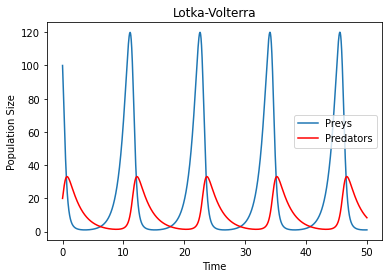

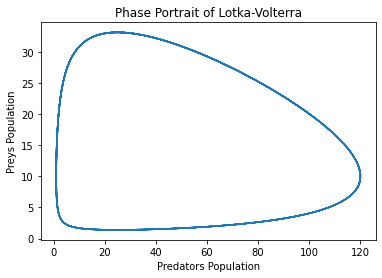

In [4]:
# timestep determines the accuracy of the euler method of integration
timestep = 0.0001
# the time at which the simulation ends
end_time = 50

# creates a time vector from 0 to end_time, seperated by a timestep
t = np.arange(0,end_time,timestep)

# intialize rabbits (x) and foxes (y) vectors
x = []
y = []

"""" definition of lotka-volterra parameters"""
# birth rate of preys
a = 1
# death rate of preys due to predation
b = 0.1
# natural death rate of predators
c = 0.5
# factor that describes how many eaten preys give birth to a new predator
d = 0.02

""" euler integration """

# initial conditions for the preys (x) and predators (y) populations at time=0
x.append(100)
y.append(20)

for index in range(1,len(t)):
    
    # evaluate the current differentials
    xd = x[index-1] * (a - b*y[index-1])
    yd = -y[index-1]*(c - d*x[index-1])
    
    # evaluate the next value of x and y using differentials
    next_x = x[index-1] + xd * timestep
    next_y = y[index-1] + yd * timestep

    # add the next value of x and y 
    x.append(next_x)
    y.append(next_y)

""" visualization """
 
# visualization of populations against time
plt.plot(t, x)
plt.plot(t, y, c='red')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(('Preys', 'Predators'))
plt.title('Lotka-Volterra')
plt.show()

# phase portrait
plt.plot(x,y)
plt.xlabel('Predators Population')
plt.ylabel('Preys Population')
plt.title('Phase Portrait of Lotka-Volterra')
plt.show()

### Using odesolver

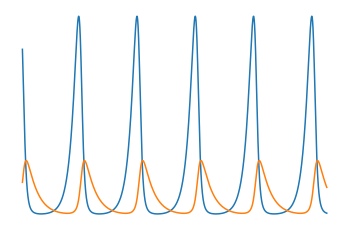

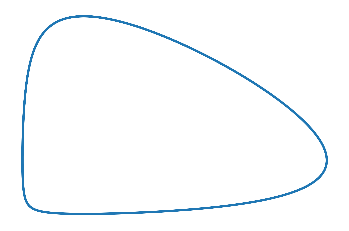

In [11]:
t_max = 6000
time_step = 0.01

t = np.arange(0, t_max, time_step)

"""" Parameters """
# birth rate of preys
a = 1
# death rate of preys due to predation
b = 0.1
# natural death rate of predators
c = 0.5
# factor that describes how many eaten preys give birth to a new predator
d = 0.02

def f(state, t):
    x, y = state
    return (a - b*y) * x, (d*x - c) * y

state0 = [100, 20]
states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca()
ax.plot(range(0,t_max), states[0:t_max, 0])
ax.plot(range(0,t_max), states[0:t_max, 1])
ax.set_axis_off()
plt.draw()
plt.show()

fig = plt.figure()
ax = fig.gca()
ax.plot(states[0:t_max, 0], states[0:t_max, 1])
ax.set_axis_off()
plt.draw()
plt.show()

### Creating dataset

In [ ]:
t_max = 6000
time_step = 0.001
frame_size = 128
frames_per_folder = 60
folder_name = 'lk_frames'

"""" Parameters """
a = 1
b = 0.1
c = 0.5
d = 0.02

def f(state, t):
    x, y = state
    return (a - b*y) * x, (d*x - c) * y

state0 = [100, 20]
t = np.arange(0, t_max, time_step)
states = odeint(f, state0, t)

dir_num = -1
os.mkdir(folder_name)

for i in range(t_max):
    if i%frames_per_folder == 0:
        print('Folder ', round(i/frames_per_folder)+1, '/', round(t_max/frames_per_folder), 'created')
        dir_num += 1
        os.mkdir("./%s" %folder_name + "/" + str(dir_num))
    fig = plt.figure(figsize=(frame_size/100., frame_size/100))
    ax = fig.gca()
    ax.set_axis_off()
    ax.plot(states[0:i-1, 0], states[0:i-1, 1], '.', c="white")
    ax.plot(states[i, 0], states[i, 1], '.')
    plt.savefig("./%s/%s/%s.jpg" %(folder_name, str(dir_num), str(i)), dpi = 100)
    plt.close(fig)

### For experiments

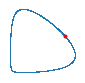

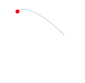

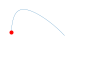

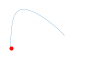

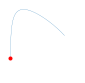

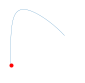

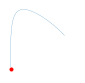

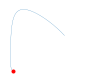

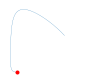

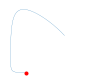

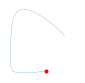

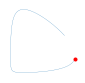

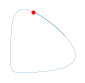

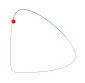

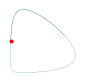

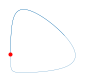

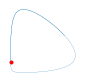

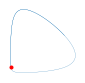

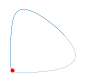

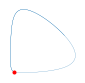

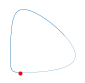

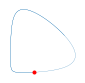

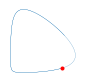

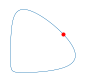

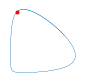

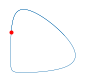

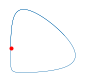

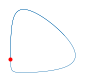

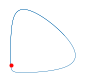

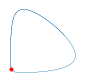

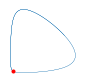

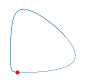

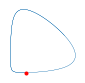

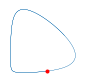

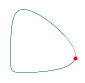

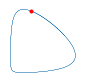

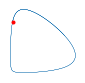

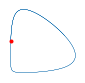

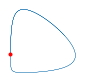

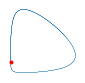

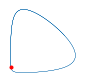

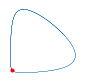

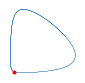

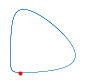

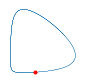

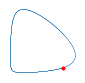

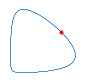

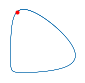

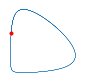

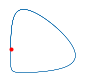

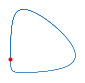

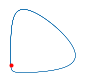

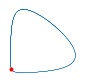

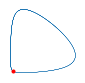

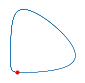

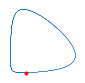

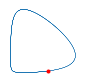

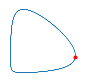

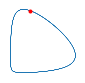

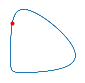

In [23]:
t_max = 6000
time_step = 0.001
frame_size = 128
frames_per_folder = 60
folder_name = 'lorenz_frames'

"""" Parameters """
a = 1
b = 0.1
c = 0.5
d = 0.02

def f(state, t):
    x, y = state
    return (a - b*y) * x, (d*x - c) * y

state0 = [100, 20]
t = np.arange(0, t_max, time_step)
states = odeint(f, state0, t)

for i in range(t_max):
    if i%100 == 0:
        fig = plt.figure(figsize=(frame_size/100., frame_size/100))
        ax = fig.gca()
        ax.set_axis_off()
        ax.plot(states[i+1:t_max, 0], states[i+1:t_max, 1], '-', c='white')
        ax.plot(states[0:i-1, 0], states[0:i-1, 1], '-', linewidth=0.2)
        ax.plot(states[i, 0], states[i, 1], '.', c='red')
        plt.show()

### Old Euler experiments

In [ ]:
# timestep determines the accuracy of the euler method of integration
timestep = 0.0001
# the time at which the simulation ends
end_time = 50

# creates a time vector from 0 to end_time, seperated by a timestep
t = np.arange(0,end_time,timestep)

# intialize rabbits (x) and foxes (y) vectors
x = []
y = []

"""" definition of lotka-volterra parameters"""
# birth rate of rabbits
a = 1
# death rate of rabbits due to predation
b = 0.1
# natural death rate of foxes
c = 0.8
# factor that describes how many eaten rabbits give birth to a new fox
d = 0.02

""" euler integration """

# initial conditions for the rabbit (x) and fox (y) populations at time=0
x.append(100)
y.append(20)

for index in range(1,len(t)):
    
    # evaluate the current differentials
    xd = x[index-1] * (a - b*y[index-1])
    yd = -y[index-1]*(c - d*x[index-1])
    
    # evaluate the next value of x and y using differentials
    next_x = x[index-1] + xd * timestep
    next_y = y[index-1] + yd * timestep

    # add the next value of x and y 
    x.append(next_x)
    y.append(next_y)

""" visualization """
 
# visualization of populations against time
plt.plot(t, x)
plt.plot(t, y, c='red')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(('Rabbits', 'Foxes'))
plt.title('Lotka-Volterra')
plt.show()

# phase portrait
plt.plot(x,y)
plt.xlabel('Fox Population')
plt.ylabel('Rabbit Population')
plt.title('Phase Portrait of Lotka-Volterra')
plt.show()

for index in range(1,len(t)):
    if index%1000==0:
        fig = plt.figure(figsize=(1.28, 1.28))
        ax = fig.gca()
        ax.plot(x[index+1:len(t)], y[index+1:len(t)], '.', c='white')
        ax.plot(x[0:index], y[0:index], '-', linewidth=0.2)
        ax.plot(x[index], y[index], '.', c='red')
        ax.set_axis_off()
        plt.show()